Importamos librerías

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


CARGAMOS LOS DATASETS PARA HACER EL RESPECTIVO ESTUDIO

In [2]:
dataf1 = pd.read_csv("./DATASETS_PRINCIPALES/Internet_Penetracion.csv")
dataf2 = pd.read_csv("./DATASETS_PRINCIPALES/Internet_tecnologia_localidad.csv")
dataf3 = pd.read_csv("./DATASETS_PRINCIPALES/Internet_velocidad_bajada.csv")
dataf4 = pd.read_csv("./DATASETS_PRINCIPALES/historico_velocidad_internet.csv")
dataf5 = pd.read_csv("./DATASETS_PRINCIPALES/Telefonia_movil.csv")
dataf6 = pd.read_csv("./DATASETS_PRINCIPALES/Telefonia_movil_ingresos.csv")


VAMOS A VERIFICAR QUE LOS DATASETS_PRINCIPALES ESTEN SUBIDOS CORRECTAMENTE

In [3]:
dataf1

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"
...,...,...,...,...
835,2014,1,Santa Cruz,"28,94"
836,2014,1,Santa Fe,"47,85"
837,2014,1,Santiago Del Estero,"16,31"
838,2014,1,Tierra Del Fuego,"63,97"


INICIAMOS A EXPLORAR LOS DATOS DEL PRIMER DATASETS_PRINCIPAL "dataf1"

In [4]:
# INFORMACION DEL DATAFRAME
dataf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


In [5]:
# AHORA VAMOS A EXTRAER LAS ESTADISTICAS DEL DATAFRAME
dataf1.describe()

,Año,Trimestre
count,840.000000,840.000000
mean,2017.885714,2.457143
std,2.528745,1.105009
min,2014.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,2.000000
75%,2020.000000,3.000000
max,2022.000000,4.000000


In [6]:
# VEMOS LOS VALORES NULOS DE CADA COLUMNA
dataf1.isnull().sum()

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64

In [7]:
# CONTAMOS LOS VALORES UNICOS DE CADA COLUMNA
dataf1.nunique()

Año                               9
Trimestre                         4
Provincia                        24
Accesos por cada 100 hogares    779
dtype: int64

In [8]:
# LLAMAMOS A LA LISTA DE PROVINCIAS DEL DATAFRAME
dataf1['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Córdoba', 'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

In [9]:
# VEMOS LA LISTA DE LOS AÑOS UNICOS EN EL DATAFRAME
dataf1['Año'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

In [10]:
# VEMOS LA LISTA DE LOS DATOS UNICOS POR TRIMESTRE DEL DATAFRAME
dataf1['Trimestre'].unique()

array([3, 2, 1, 4], dtype=int64)

AHORA ES EL MOMENTO DE VER LOS GRAFICOS PARA LA DETECCION DE VALORES ATIPICOS Y PATRONES


In [11]:
# PARA ELLO ES IMPORTANTE CONVERTIR LA COLUMNA 'ACCESOS POR CADA 100 HOGARES' A TIPO NUMERICO
dataf1['Accesos por cada 100 hogares'] = pd.to_numeric(dataf1['Accesos por cada 100 hogares'].str.replace(',', '.'))

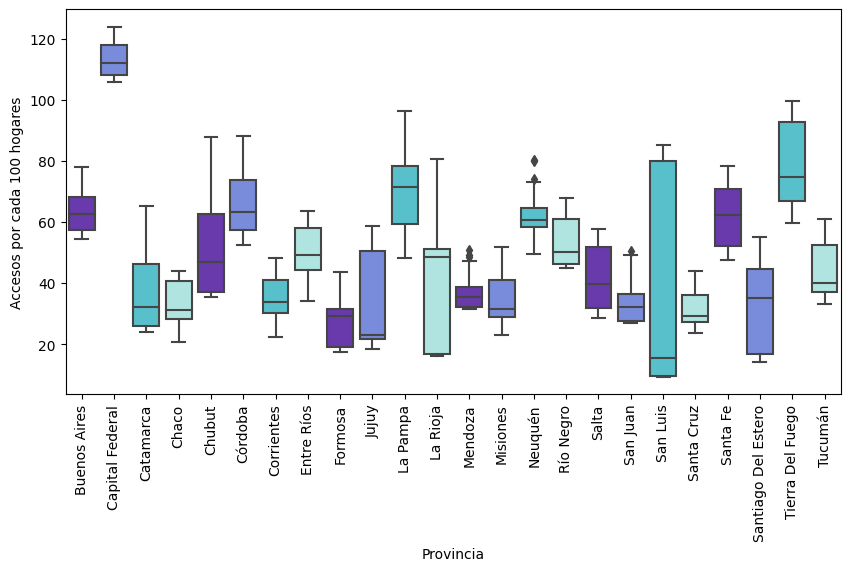

In [12]:
# VISUALIZAREMOS EL DIAGRAMA DE CAJA PARA ENCONTRAR VALORES ATIPICOS
# UTILIZAMOS LA PALETA DE COLORES PAGINA colorhunt.co
colors = ["#6527BE", "#6981EB", "#45CFDD", "#A7EDE7"]
plt.figure(figsize=(10, 5))
sns.boxplot(x='Provincia', y='Accesos por cada 100 hogares', data=dataf1, palette=colors)
plt.xticks(rotation=90)
plt.show()

EN ESTE ANALISIS OBSERVAMOS ALGUNOS VALORES ATIPICOS COMO SON:
- LA PROVINCIA DE BUENOS AIRES TIENE LA MEDIANA MAS ALTA QUE TODAS LAS PROVINCIAS
- LAS PROVINCIAS DE MENDOZA, NEUQUEN, SAN JUAN VEMOS QUE LOS ACCESOS POR CADA 100 HOGARES SON SIGNIFICATIVAMENTE MAS ALTOS
- VEMOS QUE LAS MAYORIAS DE LAS PROVINCIAS TIENEN UNA MEDIANA SIMILAR EN CUANTO AL ACCESO DE INTERNET
- ESTOS DATOS ANALIZADOS NOS PERMITEN TOMAR DECISIONES E IDENTIFICAR QUE ESTRATEGIA SE DEBE IMPLEMENTAR PARA PODER LLEGAR A LAS ZONAS DEL PAIS DONDE EL SERVICIO ES CON MENOS 
AFLUENCIA.

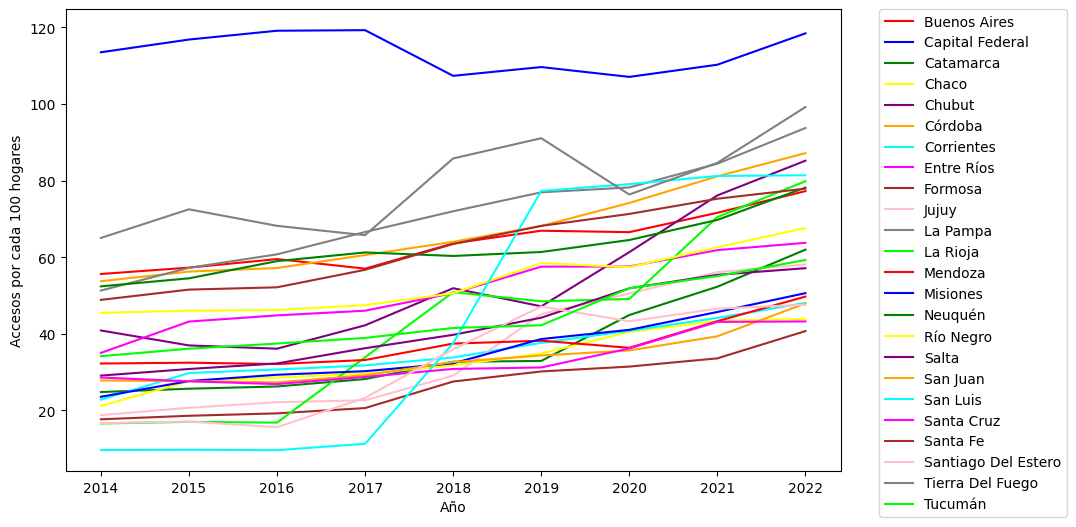

In [13]:
# VISUALIZAREMOS EL GRAFICO DE LINEA PARA VER COMO HA CAMBIADO LA PENETRACION DE INTERNET EN EL TIEMPO
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'lime','red', 'blue', 'green', 'yellow', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'pink', 'gray', 'lime']
plt.figure(figsize=(10, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', data=dataf1, palette=colors, errorbar=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

EN ESTE GRAFICO OBSERVAMOS LO SIGUIENTE:
- PROVINCIA COMO CAPITAL FEDERAL O BUENOS AIRES ES LA CAPITAL DE LA REPUBLICA DE ARGENTINA ESTA ES LA QUE MAYOR POBLACION TIENE EN ESTE PAIS, ES UNA DE LAS MAS DESARROLLADAS ECONOMICAMENTE, Y VEMOS COMO EL ACCESO A INTERNET A ALCANZADO UN ALTO GRADO DE PENETRACION.
- PROVINCIA DE TIERRA DEL FUEGO VEMOS COMO EL SERVICIO DE INTERNET HA IDO INCREMENTANDO CON EL PASO DE LOS AÑOS, Y VEMOS COMO DURANTE LOS AÑOS 2018 Y 2019 SE HA MANTENIDO ENTRE UN 80% Y 90% SU SERVICIO.
- PROVINCIA DE  SAN LUIS VEMOS COMO EN EL AÑO 2017 HASTA EL 2019 CREO UN AUMENTO PROGRESIVO DEL 10% AL 75%
- CON ESTO PUEDO CONCLUIR QUE EL GOBIERNO DE ARGENTINA A TENIDO UN COMPROMISO CON SUS HABITANTES, YA QUE A MEDIDA QUE PASAN LOS AÑOS EL INTERNET LLEGA A DIFERENTES REGIONES

AHORA VAMOS A ANALIZAR EL DATAFRAME "dataf2"


In [14]:
# veamos las primeras filas de DF
dataf2.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,NaN
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,NaN
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,NaN
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,NaN
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,NaN


In [15]:
# VAMOS A CONVERTIR LOS VALORES "-0" A CERO PARA DE ESTA FORMA EXPORTAR NUESTRO DATAFRAME A POWERBI
dataf2.fillna(0, inplace=True)

In [16]:
# VEMOS LOS CAMBIOS EJECUTADOS
dataf2.head()

,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general,Unnamed: 13
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4.704,- 0,2,- 0,975,- 0,664,7.218,0.0
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,- 0,- 0,- 0,10,1,- 0,- 0,192,0.0
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,- 0,- 0,- 0,- 0,- 0,- 0,- 0,181,181,0.0
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,- 0,782,- 0,6,167,- 0,- 0,327,1.282,0.0
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,- 0,- 0,- 0,- 0,- 0,- 0,- 0,6,6,0.0


In [17]:
# VER LA INFORMACION DEL DATAFRAME
dataf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Provincia      3142 non-null   object 
 1   Partido        3142 non-null   object 
 2   Localidad      3142 non-null   object 
 3   Link Indec     3142 non-null   object 
 4   ADSL           3142 non-null   object 
 5   CABLEMODEM     3142 non-null   object 
 6   DIAL UP        3142 non-null   object 
 7   FIBRA OPTICA   3142 non-null   object 
 8   OTROS          3142 non-null   object 
 9   SATELITAL      3142 non-null   object 
 10  WIMAX          3142 non-null   object 
 11  WIRELESS       3142 non-null   object 
 12  Total general  3142 non-null   object 
 13  Unnamed: 13    3142 non-null   float64
dtypes: float64(1), object(13)
memory usage: 343.8+ KB


In [18]:
# CONTAR EL NUMERO DE VALORES NUELOS EN CADA COLUMNA
dataf2.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
ADSL             0
CABLEMODEM       0
DIAL UP          0
FIBRA OPTICA     0
OTROS            0
SATELITAL        0
WIMAX            0
WIRELESS         0
Total general    0
Unnamed: 13      0
dtype: int64

In [19]:
# VAMOS A CONTAR EL NUMERO DE VALORES UNICOS EN CADA COLUMNA
dataf2.nunique()

Provincia          24
Partido           432
Localidad        2850
Link Indec       2718
ADSL              724
CABLEMODEM        693
DIAL UP            86
FIBRA OPTICA      706
OTROS             219
SATELITAL          24
WIMAX              12
WIRELESS          606
Total general    1348
Unnamed: 13         1
dtype: int64

In [20]:
# AHORA VAMOS A EXPORTAR ESTE NUEVO DATAFRAME PARA ASI PODERLO VISUALIZAR EN POWERBI
dataf2.to_csv("Internet_tecnologia_localidad_Pbi.csv", index=False)

VAMOS A VISUALIZAR LOS GRAFICOS PARA LA DETECCION DE PATRONES Y VALORES ATIPICOS

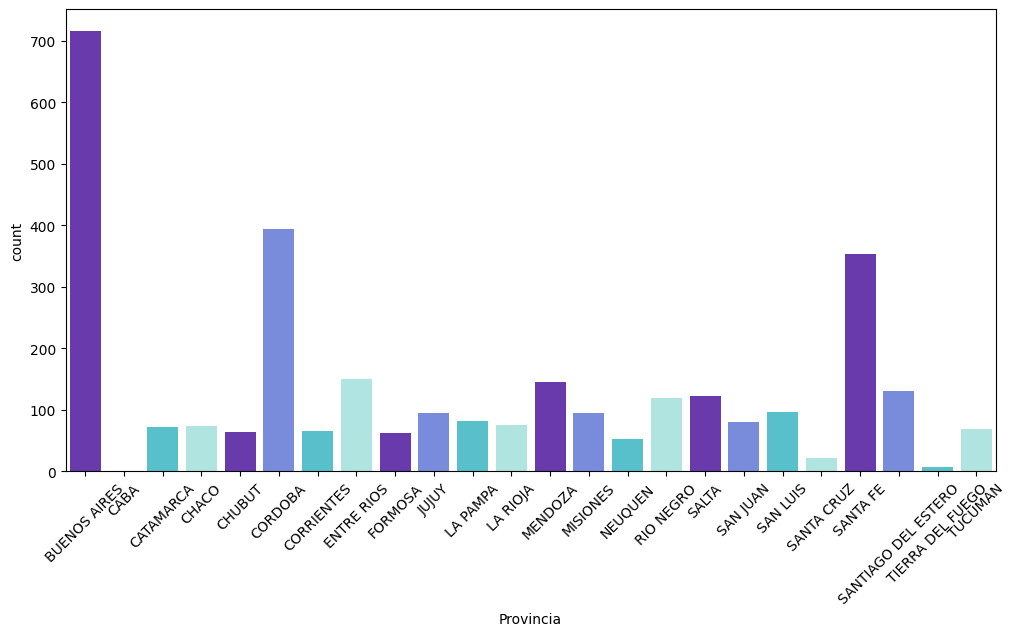

In [21]:
colors = ["#6527BE", "#6981EB", "#45CFDD", "#A7EDE7"]
plt.figure(figsize=(12,6))
sns.countplot(x='Provincia', palette=colors, data=dataf2)
plt.xticks(rotation=45)
plt.show()

CON ESTA INFORMACION PODEMOS CONCLUIR:
- LAS PROVINCIAS DE BUENOS AIRES, CORDOBA Y SANTA FE: TIENEN UN MAYOR NUMERO DE DATOS RECOLECTADOS YA QUE SON LAS PROVINCIAS MAS POBLADAS Y CON MAYOR ACTIVIDAD ECONOMICA
- LA PROVINCIA TIERRA DEL FUEGO: SE OBSERVA QUE HAY UNA MENOR CANTIDAD DE DATOS RECOLECTADOS, YA QUE ESTA ES UNA PROVINCIA QUE TIENE UN MENOR NUMERO DE HABITANTES
- ES IMPORTANTE RECORDAR QUE LOS DATOS PUEDEN ESTAR SESGADOS DEBIDO A LA FORMA EN QUE SE RECOLECTARON Y A LAS FUENTES DE DATOS DISPONIBLES


Text(0.5, 1.0, 'DISTRIBUCION DE CONEXIONES DE FIBRA OPTICA POR LOCALIDAD')

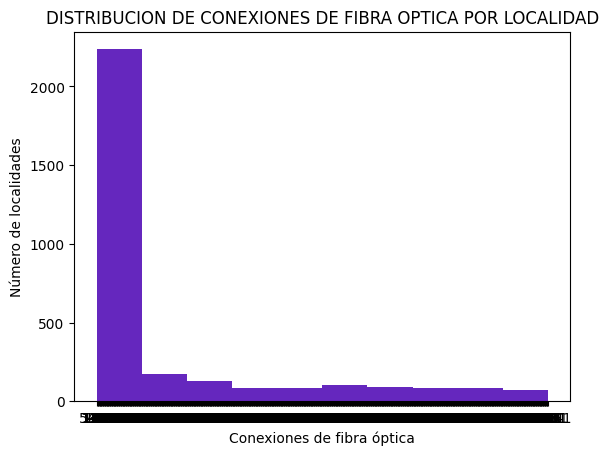

In [22]:
# AHORA VAMOS A FILTRAR UN DATAFRAME PARA CREAR UN HISTOGRAMA
fibra_optica = dataf2["FIBRA OPTICA"]
# CREACION DEL HISTOGRAMA
plt.hist(fibra_optica, color="#6527BE")
# ES IMPORTANTE AGREGAR LAS ETIQUETAS Y TITULO
plt.xlabel("Conexiones de fibra óptica")
plt.ylabel("Número de localidades")
plt.title("DISTRIBUCION DE CONEXIONES DE FIBRA OPTICA POR LOCALIDAD") 

CON ESTA INFORMACION PODEMOS CONCLUIR:
- LA CONEXION A FIBRA OPTICA: HAY POCAS LOCALIDADES CON CONEXIONES DE FIBRA OPTICA
- HAY UN GRAN NUMERO DE LOCALIDADES CON OTRAS CONEXIONES
- ESTE HISTOGRAMA ME PERMITE IDENTIFICAR QUE LOCALIDADES NECESITAN MEJORAR SU INFRAESTRUCTURA DE FIBRA OPTICA

AHORA VAMOS A ANALIZAR EL DATAFRAME "dataf3"


In [23]:
# OBSERVEMOS LAS PRIMERAS FILAS DE DATAFRAME
dataf3.head()

,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,NaN,NaN,NaN,2,NaN,NaN,...,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# VAMOS A EXTRAER LA INFORMACION DE EL DATAFRAME
dataf3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3098 entries, 0 to 3097
Data columns (total 83 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3098 non-null   object 
 1   Partido     3098 non-null   object 
 2   Localidad   3098 non-null   object 
 3   Link Indec  3098 non-null   object 
 4   Otros       956 non-null    object 
 5   0,256 mbps  29 non-null     float64
 6   0,375 mbps  1 non-null      float64
 7   0,5 mbps    643 non-null    object 
 8   0,512 mbps  524 non-null    float64
 9   0,625 mbps  1 non-null      float64
 10  0,75 mbps   284 non-null    object 
 11  1 mbps      931 non-null    object 
 12  1,25 mbps   1 non-null      float64
 13  1,5 mbps    16 non-null     object 
 14  2 mbps      741 non-null    object 
 15  2,2 mbps    1 non-null      float64
 16  2,5 mbps    3 non-null      float64
 17  3 mbps      1388 non-null   object 
 18  3,3 mbps    1 non-null      float64
 19  3,5 mbps    373 non-null   

In [25]:
# VAMOS A CONTAR EL NUMERO DE VALORES NULOS DE CADA COLUMNA
dataf3.isnull().sum()

Provincia        0
Partido          0
Localidad        0
Link Indec       0
Otros         2142
              ... 
85 mbps       3097
90 mbps       3096
92 mbps       3096
95 mbps       3097
100 mbps      2545
Length: 83, dtype: int64

INICIAREMOS CON LA VISUALIZACION DE GRAFICOS PARA LA DETECCION DE VALORES ATIPICOS Y PATRONES

In [26]:
# VERIFICAMOS SI HAY CELDAS NO NUMERICAS EN LA COLUMNA "100 mbps"
non_numeric_values = dataf3[~dataf3['100 mbps'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_values)

         Provincia          Partido   
11    BUENOS AIRES       9 de Julio  \
17    BUENOS AIRES    Adolfo Alsina   
26    BUENOS AIRES          Alberti   
28    BUENOS AIRES  Almirante Brown   
29    BUENOS AIRES  Almirante Brown   
...            ...              ...   
3066       TUCUMAN            Lules   
3091       TUCUMAN       Tafí Viejo   
3092       TUCUMAN       Tafí Viejo   
3093       TUCUMAN       Tafí Viejo   
3097       TUCUMAN      Yerba Buena   

                                              Localidad Link Indec Otros   
11                                           9 de Julio    6588100     1  \
17                                               Carhué    6007010   NaN   
26                   Alberti   (Est. Andrés Vaccarezza)    6021010   NaN   
28                                              Adrogué    6028010   NaN   
29                                              Burzaco    6028010    50   
...                                                 ...        ...   ...   

In [27]:
# ELIMINAREMOS LAS FILAS QUE CONTENGAN CELDAS NO NUMERICAS EN LA COLUMNA "100mbps"
df3 = dataf3[dataf3['100 mbps'].apply(lambda x: isinstance(x, (int, float)))]

In [28]:
# CONVERTIMOS LOS VALORES NULOS A 0 PARA PODER EXPORTAR EL DATAFRAME A POWERBI
dataf3.fillna(0, inplace=True)

In [29]:
# observamos los cambios realizados
dataf3.head()


,Provincia,Partido,Localidad,Link Indec,Otros,"0,256 mbps","0,375 mbps","0,5 mbps","0,512 mbps","0,625 mbps",...,75 mbps,78 mbps,80 mbps,82 mbps,83 mbps,85 mbps,90 mbps,92 mbps,95 mbps,100 mbps
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,0,0.0,0.0,2,0.0,0.0,...,0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,BUENOS AIRES,25 de Mayo,Agustín Mosconi,6854010,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,BUENOS AIRES,25 de Mayo,Del Valle,6854020,0,0.0,0.0,1,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,BUENOS AIRES,25 de Mayo,Ernestina,6854030,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0.0,0.0,0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [30]:
# EXPORTAMOS EL NUEVO DATAFRAME PARA PODERLO VISUALIZAR EN POWERBI
dataf3.to_csv("Internet_velocidad_bajada_pbi.csv", index=False)

EL HISTOGRAMA NOS PERMITE VER LA DISTRIBUCION DE LA VELOCIDAD "0,256 mbps"

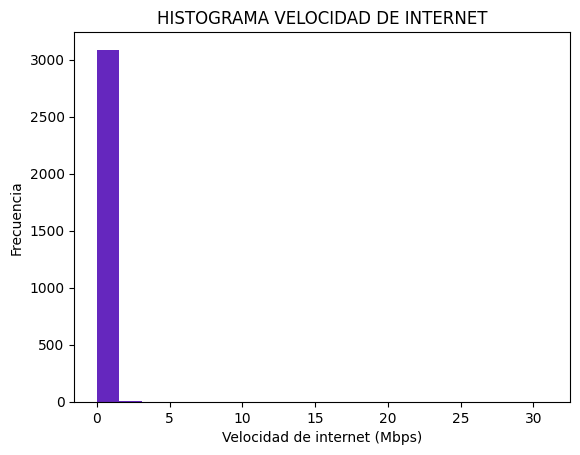

In [31]:
# HISTOGRAMA
plt.hist(dataf3['0,256 mbps'], color="#6527BE", bins=20)
plt.xlabel('Velocidad de internet (Mbps)')
plt.ylabel('Frecuencia')
plt.title('HISTOGRAMA VELOCIDAD DE INTERNET')
plt.show()

AHORA VAMOS A ANALIZAR EL DATAFRAME "dataf4"

In [32]:
# OBSERVEMOS LAS PRIMERAS FILAS DEL DATAFRAME
dataf4.head()

,Año,Trimestre,Provincia,Mbps (Media de bajada),Unnamed: 4,Unnamed: 5
0,2022,3,Buenos Aires,70,NaN,NaN
1,2022,3,Capital Federal,101,NaN,NaN
2,2022,3,Catamarca,61,NaN,NaN
3,2022,3,Chaco,53,NaN,NaN
4,2022,3,Chubut,16,NaN,NaN


In [33]:
# AHORA VAMOS A ELIMINAR LAS COLUMNAS QUE NO NOS SIRVEN
dataf4 = dataf4.drop(['Unnamed: 4', 'Unnamed: 5'], axis=1)

In [34]:
# AHORA VAMOS A OBSERVAR LA INFORMACION SOBRE EL DATAFRAME
dataf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Año                     840 non-null    int64 
 1   Trimestre               840 non-null    int64 
 2   Provincia               840 non-null    object
 3   Mbps (Media de bajada)  840 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.4+ KB


In [35]:
# AHORA CONTAMOS EL NUMERO DE VALORES NULOS DE CADA COLUMNA
dataf4.isnull().sum()

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64

In [36]:
# CREAMOS UNA NUEVA COLUMNA PARA CONCATENARLA CON LAS COLUMNAS "AÑO" "TRIMESTRE"
dataf4['año_trimestre'] = dataf4['Año'].astype(str) + '-T' + dataf4['Trimestre'].astype(str)


In [37]:
# EXPORTAMOS UN NUEVO PDF ´PARA VISUALIZARLO EN POWERBI
dataf4.to_csv("historico_velocidad_internet_Pbi.csv", index=False)

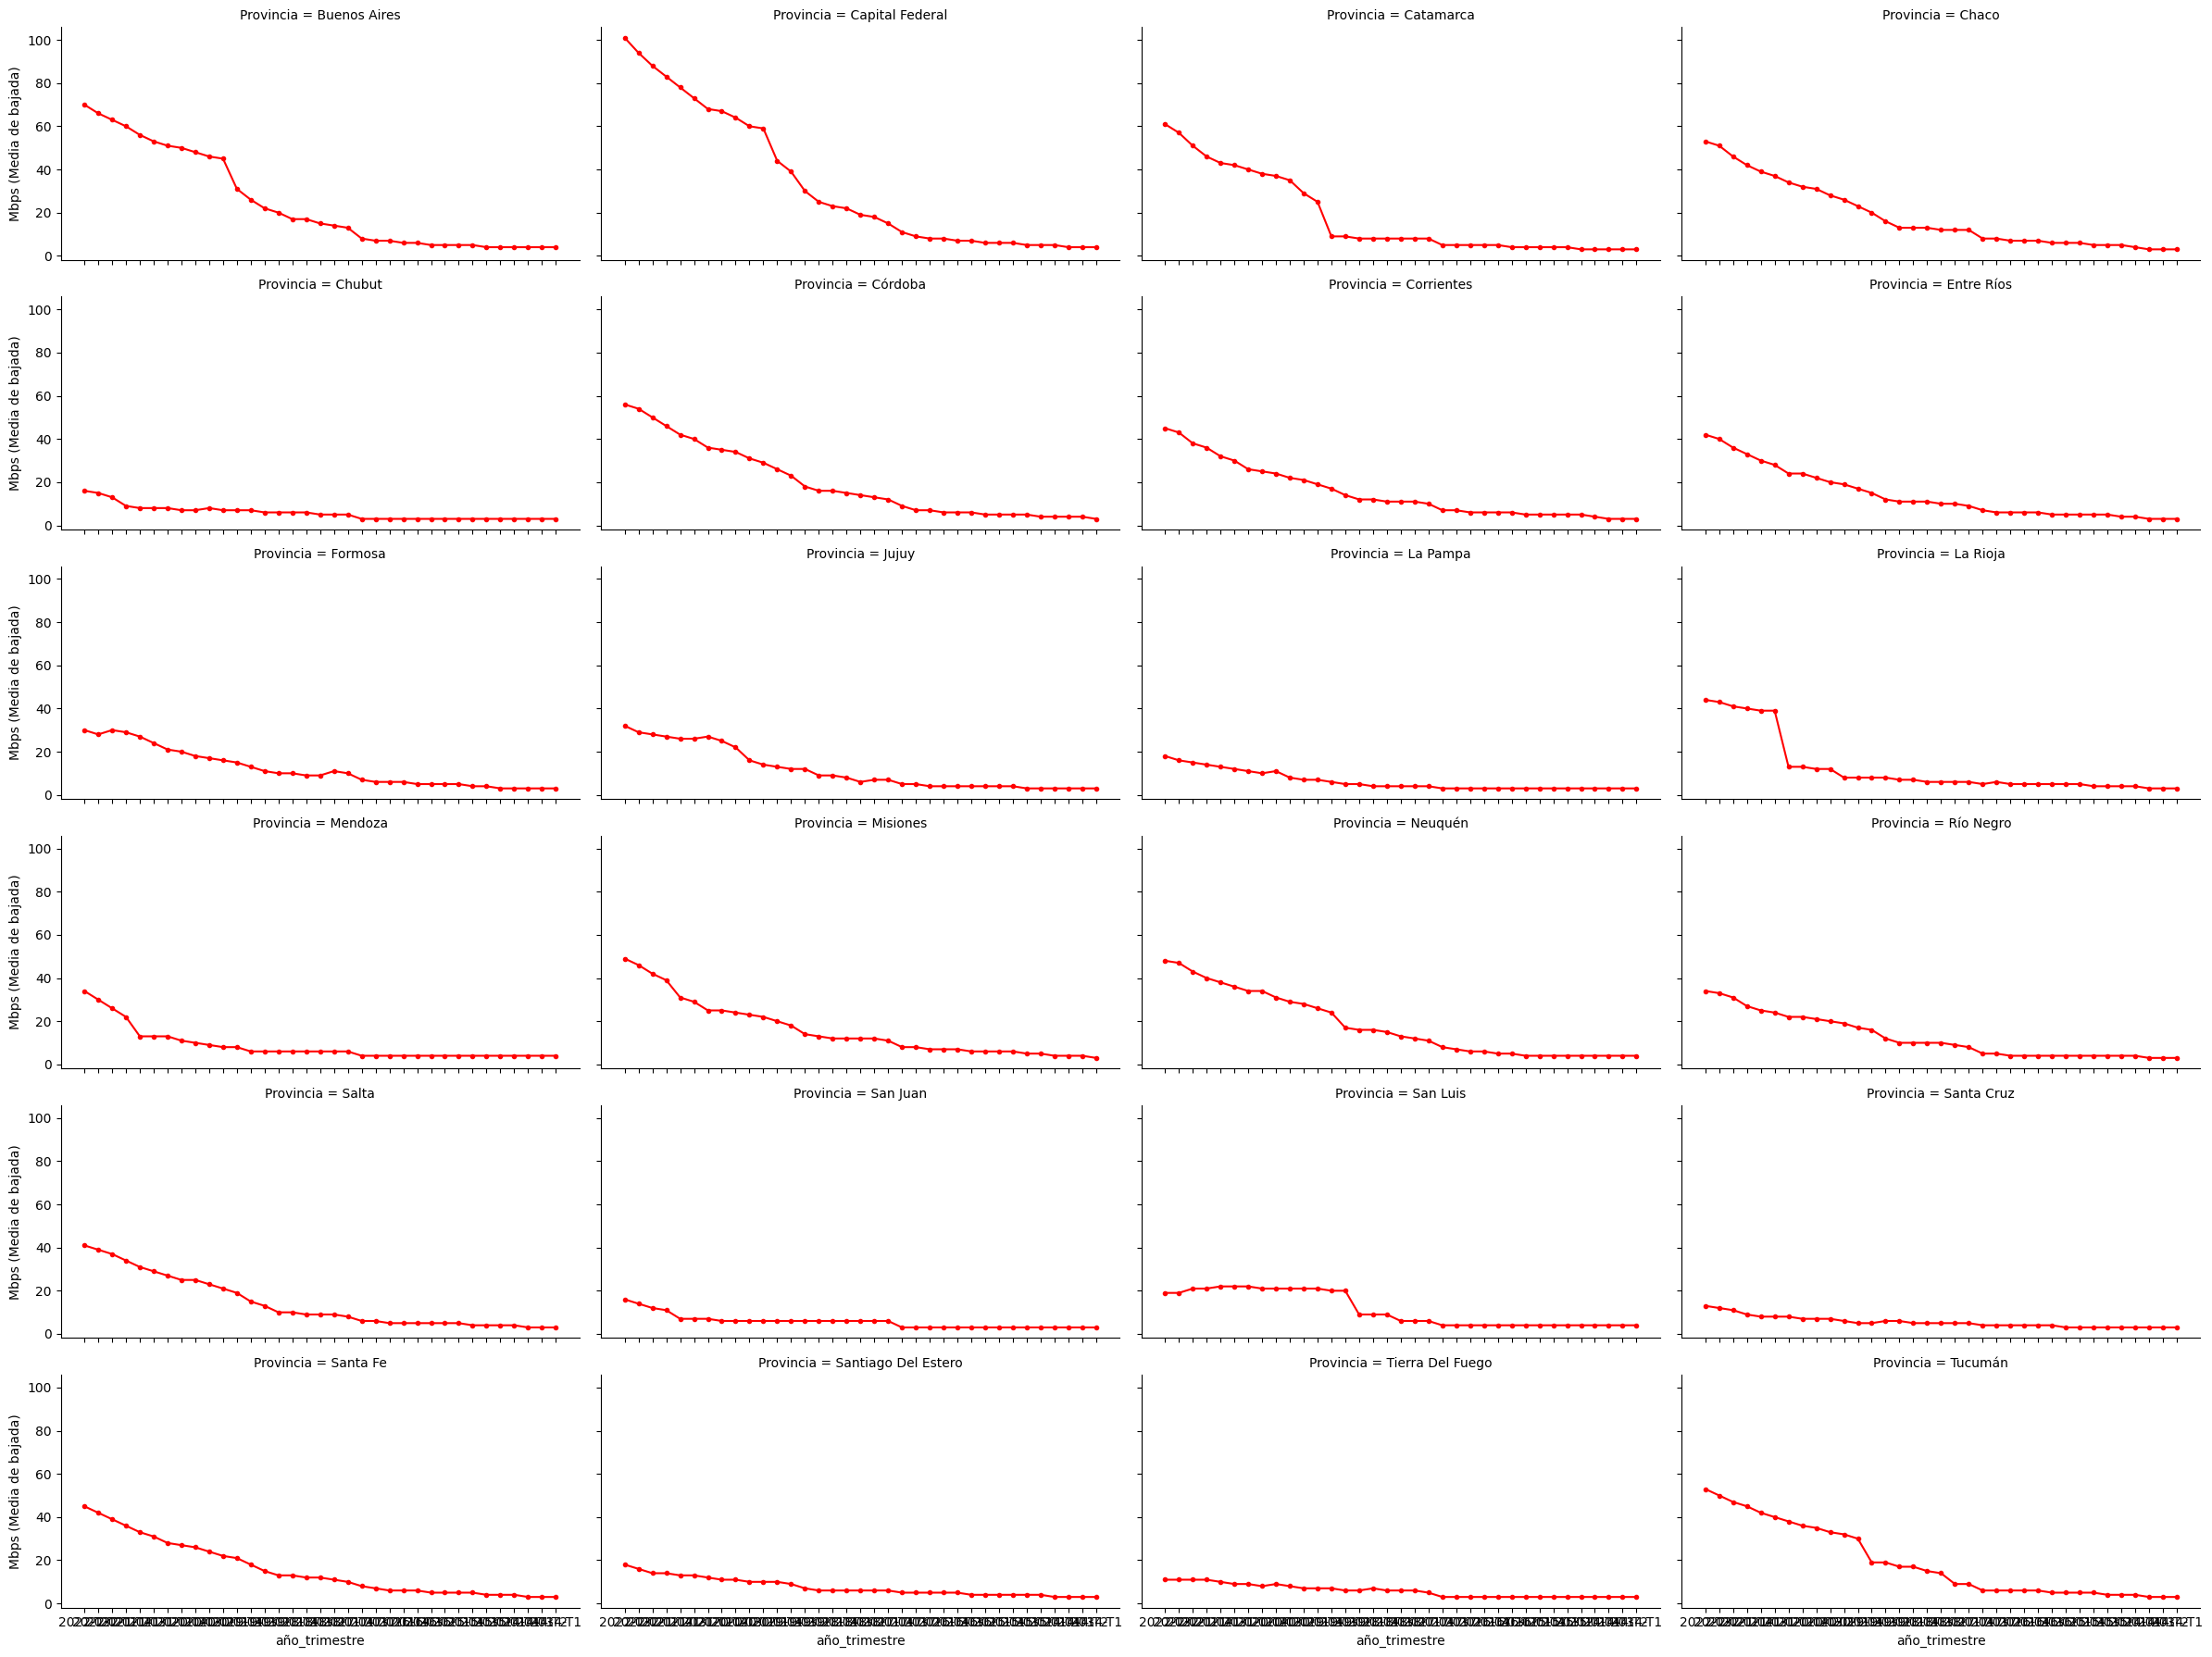

In [38]:
g = sns.FacetGrid(dataf4, col='Provincia', col_wrap=4, height=3, aspect=2)
g.map(plt.plot, 'año_trimestre', 'Mbps (Media de bajada)', color='red', marker='.')


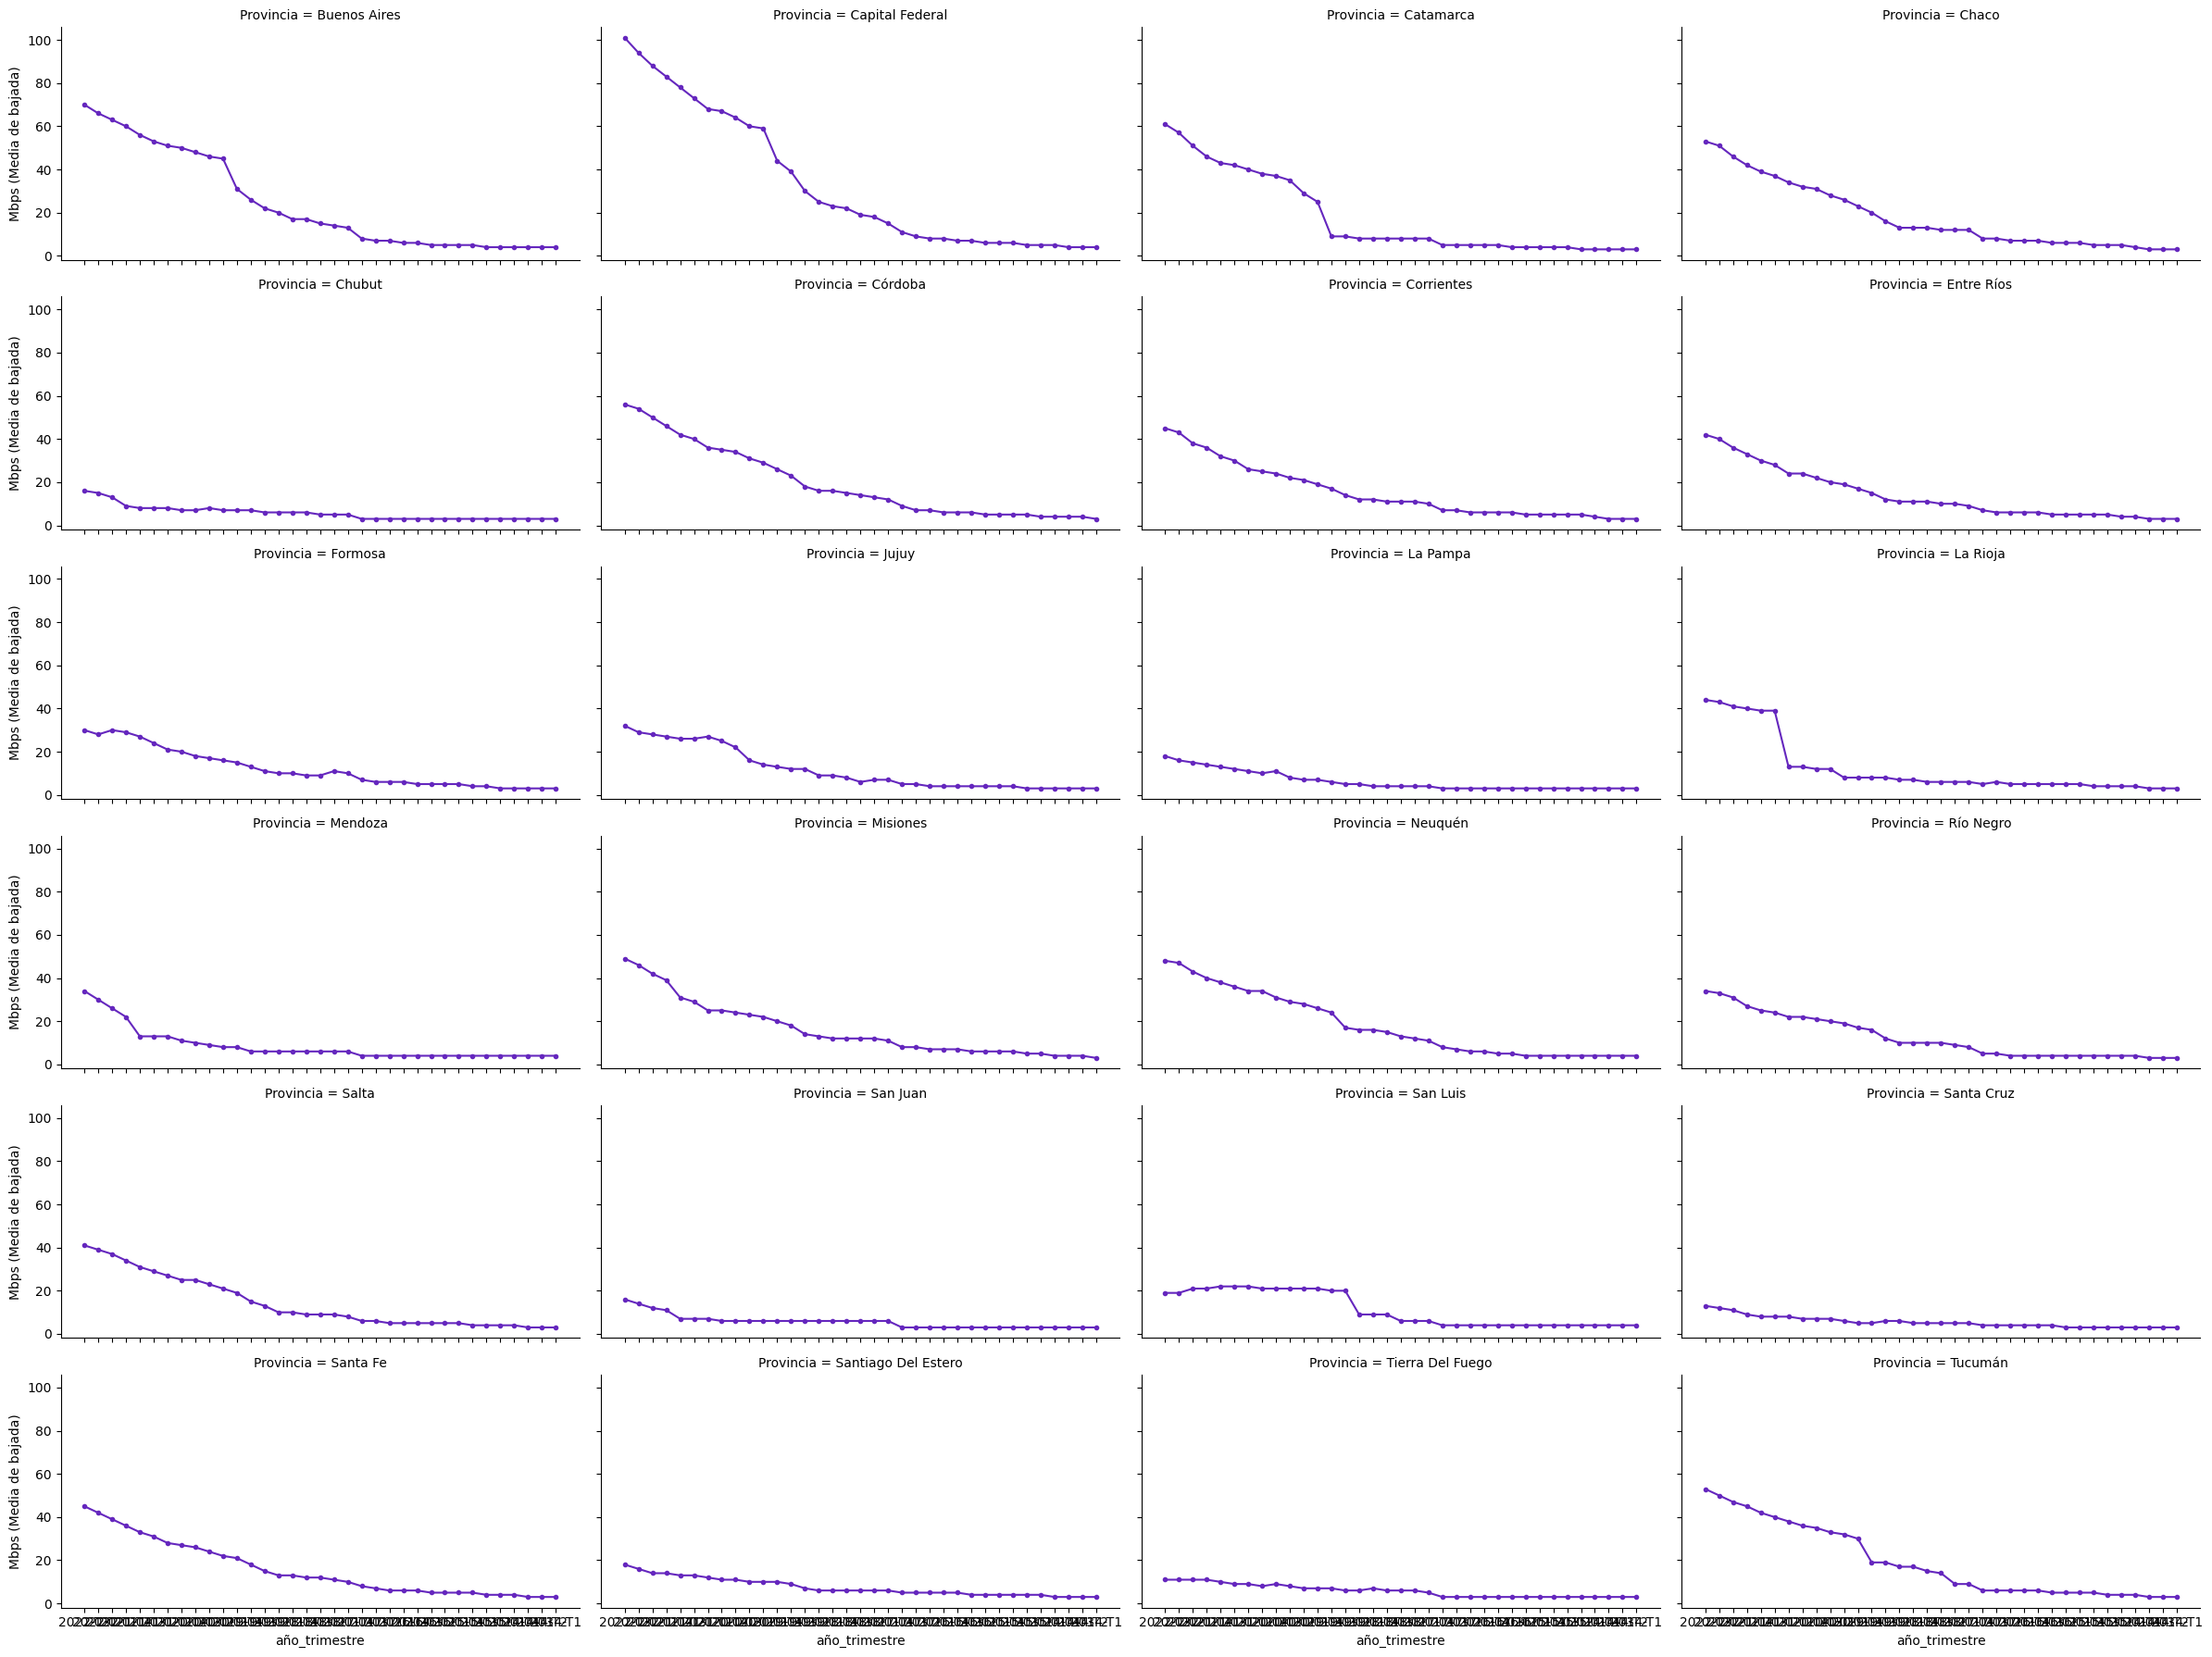

In [39]:
# AHORA HACEMOS EL GRAFICO DE LINEAS POR PROVINCIA
g = sns.FacetGrid(dataf4, col='Provincia', col_wrap=4, height=3, aspect=2)
g.map(plt.plot, 'año_trimestre', 'Mbps (Media de bajada)', color="#6527BE", marker='.')

CON ESTA INFORMACION OBSERVAMOS LO SIGUIENTE:
- LA VELOCIDAD MEDIA DE BAJADA VARIA A LO LARGO DE LOS AÑOS Y TRIMESTRES
- PODEMOS VER SI HAY ALGUNA TENDENCIA EN LA VELOCIDAD DE BAJADA EN CADA PROVINCIA 

In [40]:
# IDENTIFICAR LAS COLUMNAS NO NUMERICAS EN EL DATAFRAME USANDO EL dtypesatributo:
non_numeric_cols = dataf4.select_dtypes(exclude=[np.number]).columns

In [41]:
# ELIMINAMOS DEL DATAF4 LAS COLUMNAS NO NUMERICAS
dataf4_numeric = dataf4.drop(non_numeric_cols, axis=1)

<Axes: >

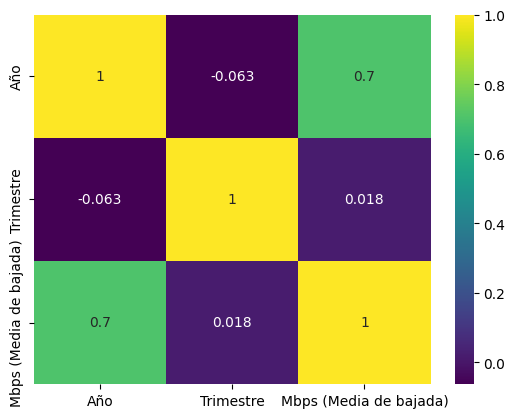

In [42]:
# VISUALIZAMOS LOS DATOS EN UN HEATMAP DE CORRELACION O MAPA DE CALOR
sns.heatmap(dataf4_numeric.corr(), annot=True, cmap='viridis')

AL REALIZAR ESTE CODIGO NOS GENERA UN HEATMAP O MAPA DE CALOR/CORRELACION QUE NOS PERMITE VER LAS VARIABLES NUMERICAS EN EL CONJUNTO DE DATOS Y DE ESTA FORMA OBSERVAR SI HAY ALGUNA CORRELACION ENTRE LA VELOCIDAD DE BAJADA Y LAS OTRAS VARIABLES DEL CONJUNTO DE DATOS

AHORA VOY A COMENZAR A ANALIZAR LOS DATASETS PARA TELEFONIA MOVIL

In [43]:
dataf5

,Año,Trimestre,Accesos por cada 100 hab,Periodo
0,2013,1,154,Ene-Mar 2013
1,2013,2,156,Abr-Jun 2013
2,2013,3,159,Jul-Sept 2013
3,2013,4,159,Oct-Dic 2013
4,2014,1,148,Ene-Mar 2014
5,2014,2,143,Abr-Jun 2014
6,2014,3,143,Jul-Sept 2014
7,2014,4,143,Oct-Dic 2014
8,2015,1,140,Ene-Mar 2015
9,2015,2,139,Abr-Jun 2015


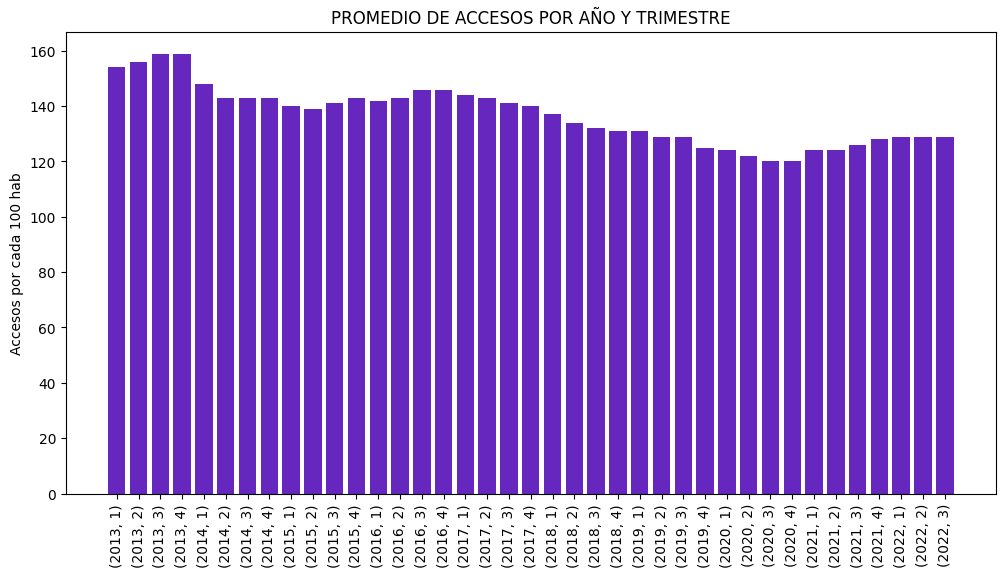

In [44]:
fig, ax = plt.subplots(figsize=(12, 6))
# Agrupo por año y trimestre y calcular la media de accesos por cada 100 hogares
ano_trimestre_group = dataf5.groupby(["Año", "Trimestre"]).mean(numeric_only=True)
                                                     
# Genero la gráfica
plt.bar(np.arange(len(ano_trimestre_group)), ano_trimestre_group["Accesos por cada 100 hab"], color="#6527BE")
# Configuro los ejes y el título de la gráfica
plt.xticks(np.arange(len(ano_trimestre_group)), ano_trimestre_group.index, rotation=90)
plt.ylabel("Accesos por cada 100 hab")
plt.title("PROMEDIO DE ACCESOS POR AÑO Y TRIMESTRE")
plt.show()

PODEMOS OBSERVAR LOS ACCESOS POR TRIMESTRE Y AÑO

In [45]:
# ELIMINO LA COLUMNA QUE NO VOY A UTILIZAR
dataf5 = dataf5.drop("Periodo", axis = 1)  

In [46]:
# OBTENGO LOS VALORES DE ACCESOS POR CADA 100 HABITANTES EN UN PERIODO ANTERIOR
accesos_anterior = dataf5.groupby(["Año"])['Accesos por cada 100 hab'].shift(-1)

# CALCULO EL AUMENTO DEL 2% EN EL PERIODO ANTERIOR
aumento = accesos_anterior * 1.02

# ASIGNO LOS VALORES CALCULADOS AL TRIMESTRE SIGUIENTE
dataf5.loc[:, "Accesos por cada 100 hab trimestre anterior + 2%"] = round(aumento, 2)

# REMPLAZO LOS VALORES NULOS POR LOS VALORES EN LA FILA DE LA COLUMNA "Accesos por cada 100 hab"
dataf5["Accesos por cada 100 hab trimestre anterior + 2%"] = dataf5["Accesos por cada 100 hab trimestre anterior + 2%"].fillna(dataf5["Accesos por cada 100 hab"])

# CALCULO LA DIFERENCIA
dataf5["Diferencia"] = round(dataf5["Accesos por cada 100 hab trimestre anterior + 2%"] - dataf5["Accesos por cada 100 hab"], 2)

# CALCULO SU PORCENTAJE DE DIFERENCIA
dataf5["Porcentaje de diferencia"] = round(dataf5["Diferencia"] / dataf5["Accesos por cada 100 hab"] * 100, 2)

In [47]:
dataf5

,Año,Trimestre,Accesos por cada 100 hab,Accesos por cada 100 hab trimestre anterior + 2%,Diferencia,Porcentaje de diferencia
0,2013,1,154,159.12,5.12,3.32
1,2013,2,156,162.18,6.18,3.96
2,2013,3,159,162.18,3.18,2.00
3,2013,4,159,159.00,0.00,0.00
4,2014,1,148,145.86,-2.14,-1.45
5,2014,2,143,145.86,2.86,2.00
6,2014,3,143,145.86,2.86,2.00
7,2014,4,143,143.00,0.00,0.00
8,2015,1,140,141.78,1.78,1.27
9,2015,2,139,143.82,4.82,3.47


In [48]:
dataf5["Accesos por cada 100 hab"] = dataf5["Accesos por cada 100 hab"].apply(lambda x: str(x).replace('.', ',')) 
dataf5["Accesos por cada 100 hab trimestre anterior + 2%"] = dataf5["Accesos por cada 100 hab trimestre anterior + 2%"].apply(lambda x: str(x).replace('.', ','))  
dataf5["Diferencia"] = dataf5["Diferencia"].apply(lambda x: str(x).replace('.', ','))  
dataf5["Porcentaje de diferencia"] = dataf5["Porcentaje de diferencia"].apply(lambda x: str(x).replace('.', ','))  

In [49]:
# EXPORTAMOS UN NUEVO PDF ´PARA VISUALIZARLO EN POWERBI
dataf5.to_csv("acceso_100_habitantes_Pbi.csv", index = False)

In [50]:
dataf6.dtypes

Año                       int64
Trimestre                 int64
Ingresos (miles de $)    object
Periodo                  object
dtype: object

In [51]:
# ELIMINO $ Y .
dataf6["Ingresos (miles de $)"] = dataf6["Ingresos (miles de $)"].str.replace("$", "").str.replace(".", "")

In [52]:
# CAMBIO EL TIPO DE DATOS DE INGRESOS
dataf6["Ingresos (miles de $)"] = dataf6["Ingresos (miles de $)"].astype(int)

In [53]:
# BORRO LA COLUMNA PERIODO 
dataf6.drop("Periodo", axis=1, inplace=True)

In [54]:
dataf6

,Año,Trimestre,Ingresos (miles de $)
0,2013,1,13135235
1,2013,2,13970806
2,2013,3,15235659
3,2013,4,16218846
4,2014,1,15938353
5,2014,2,17680972
6,2014,3,18976053
7,2014,4,20012332
8,2015,1,19337342
9,2015,2,19945453


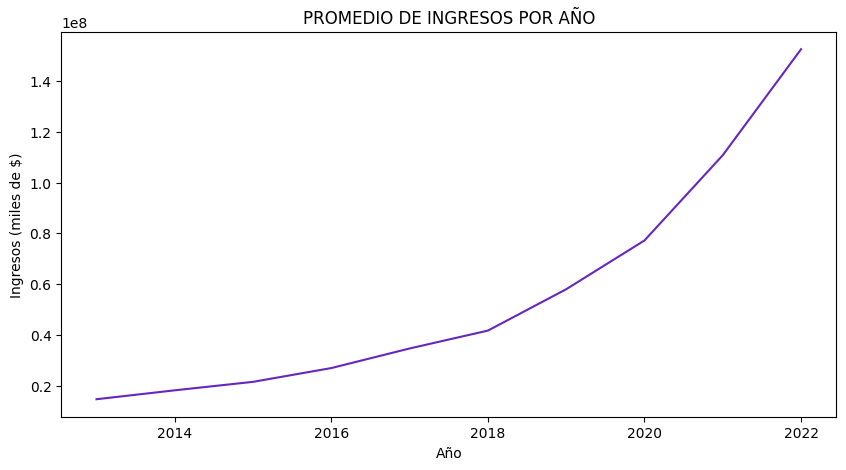

In [55]:
# AGRUPAR LOS DATOS POR TRIMESTRE Y CALCULAR EL PROMEDIO DE INGRESOS EN MILES
ingresos_por_trimestre = dataf6.groupby("Año")["Ingresos (miles de $)"].mean()

# CREAR EL GRAFICO DE LINEA
ingresos_por_trimestre.plot(kind="line", figsize=(10, 5), color="#6527BE")

# AGREGAR ETIQUETAS Y TITULO AL GRAFICO
plt.xlabel("Año")
plt.ylabel("Ingresos (miles de $)")
plt.title("PROMEDIO DE INGRESOS POR AÑO")

# MOSTRAR EL GRAFICO
plt.show()

CON ESTO OBSERVAMOS QUE LOS INGRESOS POR AÑO DE TELEFONIA MOVIL ESTA CRECIENDO

In [56]:
# EXPORTAMOS UN NUEVO PDF ´PARA VISUALIZARLO EN POWERBI
dataf6.to_csv("ingresos_telefoniaMovil_Pbi.csv", index = False)